# Twitter Sentiment Analysis

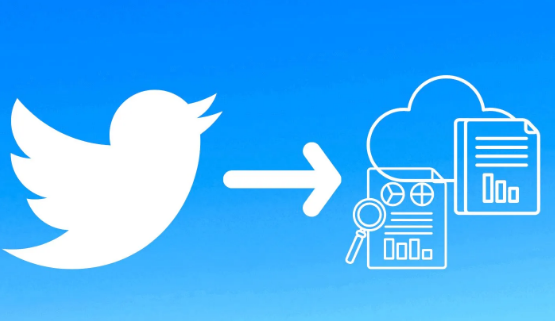

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting Visual
import seaborn as sns # for plotting Visual
import re # Regex Library
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download("punkt") # package consist of punctuation marks
nltk.download("wordnet") #
nltk.download("stopwords") # list of Stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer #
from wordcloud import WordCloud # Word Visualization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The `TweetTokenizer` is a utility class provided by the Natural Language Toolkit (NLTK) library in Python. It is specifically designed for tokenizing tweets or short text messages. Tokenization is the process of splitting text into individual units called tokens, which can be words, phrases, or even characters.

The `TweetTokenizer` has some features that make it suitable for handling tweets:

1. Splitting at Handles and Hashtags: The tokenizer recognizes Twitter handles (user mentions) and hashtags as separate tokens. For example, "@username" and "#hashtag" would be tokenized as separate entities.

2. Emoticon Handling: The tokenizer identifies emoticons and treats them as individual tokens. For instance, ":)" and ":(" would be tokenized separately.

3. URL Recognition: The tokenizer identifies URLs and treats them as a single token. This is useful for maintaining the integrity of URLs in tweets.

4. Token Normalization: The tokenizer normalizes tokens by converting them to lowercase by default. This helps in standardizing the text and reducing the vocabulary size.

Here's an example of how to use `TweetTokenizer` in Python with NLTK:

```python
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
tweet = "Excited to use the #TweetTokenizer from @NLTK for tokenizing my tweets! :) #NLTK"

tokens = tokenizer.tokenize(tweet)
print(tokens)
```

Output:
```
['Excited', 'to', 'use', 'the', '#TweetTokenizer', 'from', '@NLTK', 'for', 'tokenizing', 'my', 'tweets', '!', ':)', '#NLTK']
```

As you can see, the `TweetTokenizer` effectively splits the tweet into individual tokens while preserving the specific elements such as hashtags, handles, and emoticons as separate entities. This can be helpful for various tasks in natural language processing and sentiment analysis, especially when dealing with social media data.

## Reading DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Validation datset
val_data = pd.read_csv('/content/drive/MyDrive/0.1 Datasets/twitter_validation.csv', header = None, names=['id','information','sentiment','text'])

# Training.csv will be used for Training the data
train_data=pd.read_csv('/content/drive/MyDrive/0.1 Datasets/twitter_training.csv',header= None,names=['id','information','sentiment','text'])

In [4]:
#  extract the first five rows
val_data

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
train_data

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# checking the duplicaetes values

In [6]:
val_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
val_data.duplicated().value_counts()

False    1000
dtype: int64

In [8]:
val_data['text'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: text, Length: 1000, dtype: bool

In [9]:
val_data['text'].duplicated().value_counts()
# by these we get to know that in 'text' column of val_data dataframe there is 1 duplicate record.

False    999
True       1
Name: text, dtype: int64

In [10]:
val_data[val_data['text'].duplicated()==True]

,id,information,sentiment,text
963,4050,CS-GO,Positive,Wow


In [11]:
val_data[val_data['text']=='Wow']

,id,information,sentiment,text
218,3263,Facebook,Positive,Wow
963,4050,CS-GO,Positive,Wow


In [ ]:
train_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74677    False
74678    False
74679    False
74680    False
74681    False
Length: 74682, dtype: bool

In [12]:
train_data.duplicated().value_counts()

False    71982
True      2700
dtype: int64

In [13]:
train_data['text'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74677    False
74678    False
74679    False
74680    False
74681    False
Name: text, Length: 74682, dtype: bool

In [14]:
train_data['text'].duplicated().value_counts()

False    69492
True      5190
Name: text, dtype: int64

# Here, Dropping the duplicate will not make sense because this is a Twitter dataset, where there will be possibility of retweet by a user. So, we are keeping the data.

# Because, it will helps us in Training the data and to come up with more accurate prediction.

In [15]:
for i in range(15):
    print('train_data:\n',i,train_data['text'][i], end='\n\n\n')
    print('val_data:\n',i,val_data['text'][i], end='\n\n\n')


train_data:
 0 im getting on borderlands and i will murder you all ,


val_data:
 0 I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣


train_data:
 1 I am coming to the borders and I will kill you all,


val_data:
 1 BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…


train_data:
 2 im getting on borderlands and i will kill you all,


val_data:
 2 @Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄


train_data:
 3 im coming on borderlands and i will murder you all,


val_data:
 3 CSGO matchmaking is so full of closet hacking, it's a truly awful game.


train_data:
 4 im getting on borderlands 2 and i will murder you me all,


val_data:
 4 Now the President is slapping Americans in the face that h

In [16]:
train_data['has_http']=train_data['text'].str.contains('http')

In [17]:
train_data['has_http'].value_counts()

False    71547
True      2449
Name: has_http, dtype: int64

**From the above outcome, we got to know that there are some records in the train_data datasets which consists of URL in their records.**

In [ ]:
# here i have tried to show you that text column also consist of URl in both dataset.
# And passing a URL to train the model is not efficient way because url will not help in predicting the sentiments of a Person.
train_data[train_data['has_http']==True][['text']][:5].values

array([['Modern Warfare For $38, Borderlands 3 For $20, And More Great Game Deals (PS4, Xbox One, Switch) unsorted.co/modern-warfare… https://t.co/2n68qoJKhU'],
       ['Modern Warfare for $38, Borderlands 3 for $20 and other great games (PS4, Xbox One, Switch) unsorted.co / modern-warfare... https: / / t.co / 2n68qoJKhU'],
       ['Modern Warfare Not $38, Borderlands For For $20, All More Great Game Gear (PS4, Xbox One, Switch) unsorted.co/modern-warfare… https://t.co/2n68qoJKhU]'],
       ['Modern Warfare 11 For $ 38, Borderlands 3 For $ 20, 200 And More Great Nintendo Game Group Deals ( PS4, Xbox One, Nintendo Switch ) also unsorted. See co / w modern - warfare database … https://t.co/2n68qoJKhU ]'],
       ['Pretty Happy with this! I made these sub badges for my friend @4eyeGaming for his twitch! Go check him out! He has started streaming Borderlands 3 recently but he is a variety streamer! twitch.tv/4eyegaming .  https://t.co/BoRwkMSzRs']],
      dtype=object)

#### The Above text columns from both the datasets called train_data and val_data has some unwanted values which might give us issue while applying machine or Deep learning model

In [ ]:
# lets check the same with the val_data, just for the assurity.

In [ ]:
val_data['has_http']=val_data['text'].str.contains('http')

In [ ]:
val_data['has_http'].value_counts()

False    912
True      88
Name: has_http, dtype: int64

**From the above outcome, we got to know that there are some records in the train_data datasets which consists of URL in their records.**

In [ ]:
# here i have tried to show you that text column also consist of URl in both dataset.
# And passing a URL to train the model is not efficient way because url will not help in predicting the sentiments of a Person.
val_data[val_data['has_http']==True][['text']][:5].values

array([['Solo Q and this freak is spinning as fast as he can to lower the FPS. \nI thought they took this bs out\n\n@Rainbow6Game https://t.co/mlvHMu4qeZ'],
       ['Amazon stops accepting new online grocery customers as it cuts hours at Whole Foods stores dailymail.co.uk/news/article-8… https://t.co/jn7OMaLq3n'],
       ['Is there anything not wrong with this game why cant i claim the credits @PlayCODMobile such a joke.... #CallofDutyMobile #CODm #CoDMobile #CallofDuty https://t.co/0geOGc0Egq'],
       ['Sound ON! Enjoy the groove and this little montage I made in tribute to the Desert Eagle, the most powerful, badass, secondary weapon. Ever. #CallofDuty #ModernWarfare #Xbox @JoeCecot @ArtPeasant @Drift0r https://t.co/WookTjkBmZ'],
       ['Play with @PtitDrogo and @BlyOnFire starting at 19 CEST TODAY and get a chance to win awesome prizes from our merch store AND a @Pl4ZMAcom Gaming Booster!\n\nSounds like a good deal? \n\nThen join our discord at: discord.gg/NaKhTps\n\nTomorrow: Hea

#### The Above text columns from both the datasets called train_data and val_data has some unwanted values which might give us issue while applying machine or Deep learning model

To remove all non-alphanumeric characters from a column, except for words starting with the '#' symbol, you can use regular expressions in Python. Here's an example syntax using the pandas library:

```python
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9#\s]', '', text)

# Apply the function to the 'text' column, excluding words starting with '#'
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))
df['clean_text'] = df['clean_text'].apply(remove_non_alphanumeric)

# Print the result
print(df['clean_text'])
```

Output:
```
0          This is a #sample tweet
1    Another #example with #hashtags
2           No special characters
Name: clean_text, dtype: object
```

In this example, we define a function `remove_non_alphanumeric` that utilizes the `re.sub()` function to remove all non-alphanumeric characters from a given text. We then use the `apply()` method on the 'text' column to apply this function while excluding words starting with the '#' symbol. The result is stored in a new column called 'clean_text'. Finally, we print the contents of the 'clean_text' column.

Note that this example assumes you are working with a pandas DataFrame and have the necessary libraries (`pandas` and `re`) imported. You may need to adapt the code to fit your specific use case if you're working with a different data structure or library.

In [ ]:
train_data[train_data['text'].str.startswith('#')==True]

,id,information,sentiment,text,has_http
5150,86,Amazon,Neutral,# 2020-04-07 01: 21: 43EST.,False
43712,10304,PlayerUnknownsBattlegrounds(PUBG),Negative,# # # # # # # # # # # # # # # # # # # # # # # ...,False


In [ ]:
train_data[train_data['text'].str.contains('#')==True]['text'].values

array(['it’s like the universe doesn’t want me to get my shit together and wants me to just sit on my ass playing video games all day #',
       "It's like the universe doesn't want me to get my shit together, and wants me to just sit on my ass all day playing video games. #",
       "It's like the universe doesn't want me to get my shit together and wants me to just sit on my ass playing video games all day #",
       'it’s like the universe doesn’t want me to get my shit together but wants me to just sit on my bed reading video games all day #',
       'it will ’ because s like the universe that doesn ’ and t want me to get my shit together and wants me to can just sit on my ass here playing video games all day #',
       'it’s like the universe doesn’t want me to get my shit together nor wants me to basically sit on my ass with video games all of #',
       'RT @richardturrin: Amazon and Goldman<unk>. Perfect BaaS strategy!.. thefinancialbrand.com/92681/marcus-g…. @BrettKing / @leim

In [ ]:
train_data['text'][24830].split()

['@',
 'NewsNationTV',
 'Sir',
 'we',
 'ask',
 'you',
 'Google',
 'Play',
 'all',
 'Customer',
 'Care',
 '#.',
 'This',
 'is',
 'a',
 'fraud',
 'in',
 'which',
 '6289278238',
 '&',
 '6901530775',
 'is',
 'cheating',
 'me',
 'through',
 'any',
 'desktop',
 'application.']

In [ ]:
val_data['text'][11].split()

['Itching',
 'to',
 'assassinate',
 '#TCCGif',
 '#AssassinsCreedBlackFlag',
 '#AssassinsCreed',
 '#TheCapturedCollective',
 'pic.twitter.com/vv8MOGtCjw']

In [ ]:
a = val_data['text'].apply(lambda x: ' '.join([word for word in val_data['text'][11].split() if not word.startswith('#')]))
a

0      Itching to assassinate pic.twitter.com/vv8MOGtCjw
1      Itching to assassinate pic.twitter.com/vv8MOGtCjw
2      Itching to assassinate pic.twitter.com/vv8MOGtCjw
3      Itching to assassinate pic.twitter.com/vv8MOGtCjw
4      Itching to assassinate pic.twitter.com/vv8MOGtCjw
                             ...                        
995    Itching to assassinate pic.twitter.com/vv8MOGtCjw
996    Itching to assassinate pic.twitter.com/vv8MOGtCjw
997    Itching to assassinate pic.twitter.com/vv8MOGtCjw
998    Itching to assassinate pic.twitter.com/vv8MOGtCjw
999    Itching to assassinate pic.twitter.com/vv8MOGtCjw
Name: text, Length: 1000, dtype: object

In [ ]:
a = val_data['text'].apply(lambda x: ' '.join([word for word in val_data['text'][11].split() if not word.startswith('#')]))
a

0      Itching to assassinate pic.twitter.com/vv8MOGtCjw
1      Itching to assassinate pic.twitter.com/vv8MOGtCjw
2      Itching to assassinate pic.twitter.com/vv8MOGtCjw
3      Itching to assassinate pic.twitter.com/vv8MOGtCjw
4      Itching to assassinate pic.twitter.com/vv8MOGtCjw
                             ...                        
995    Itching to assassinate pic.twitter.com/vv8MOGtCjw
996    Itching to assassinate pic.twitter.com/vv8MOGtCjw
997    Itching to assassinate pic.twitter.com/vv8MOGtCjw
998    Itching to assassinate pic.twitter.com/vv8MOGtCjw
999    Itching to assassinate pic.twitter.com/vv8MOGtCjw
Name: text, Length: 1000, dtype: object

To remove all non-alphanumeric characters from a column, except for words starting with the '#' symbol, you can use regular expressions in Python. Here's an example syntax using the pandas library:

```python
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9#\s]', '', text)

# Apply the function to the 'text' column, excluding words starting with '#'
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))
df['clean_text'] = df['clean_text'].apply(remove_non_alphanumeric)

# Print the result
print(df['clean_text'])
```

Output:
```
0          This is a #sample tweet
1    Another #example with #hashtags
2           No special characters
Name: clean_text, dtype: object
```

In this example, we define a function `remove_non_alphanumeric` that utilizes the `re.sub()` function to remove all non-alphanumeric characters from a given text. We then use the `apply()` method on the 'text' column to apply this function while excluding words starting with the '#' symbol. The result is stored in a new column called 'clean_text'. Finally, we print the contents of the 'clean_text' column.

Note that this example assumes you are working with a pandas DataFrame and have the necessary libraries (`pandas` and `re`) imported. You may need to adapt the code to fit your specific use case if you're working with a different data structure or library.

In [18]:
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9#\s]', '', text)

# Apply the function to the 'text' column, excluding words starting with '#'
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))
df['clean_text'] = df['clean_text'].apply(remove_non_alphanumeric)

# Print the result
print(df['clean_text'])


0          This is a tweet
1             Another with
2    No special characters
Name: clean_text, dtype: object


In [19]:
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^A-Za-z0-9 ]+', '', text)

# Apply the function to the 'text' column, excluding words starting with '#'
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))
df['clean_text'] = df['clean_text'].apply(remove_non_alphanumeric)

# Print the result
print(df['clean_text'])


0          This is a tweet
1             Another with
2    No special characters
Name: clean_text, dtype: object


In [ ]:
# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)
df['text']

0            This is a #sample tweet!
1    Another #example with #hashtags!
2              No special characters.
Name: text, dtype: object

In [ ]:
df['text'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

0            This is a  sample tweet 
1    Another  example with  hashtags 
2              No special characters 
Name: text, dtype: object

# This Worked.
To remove special characters from a text while excluding words that start with the '#' symbol, you can use regular expressions in Python. Here's an example syntax that achieves this:

```python
import re

def remove_special_characters(text):
    # Regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s#]'
    
    # Split the text into words
    words = text.split()
    
    # Remove special characters from each word, excluding those starting with '#'
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

# Example usage
text = "This is a #sample tweet! It has special characters #like @and @!stuff"
cleaned_text = remove_special_characters(text)
print(cleaned_text)
```

Output:
```
This is a #sample tweet! It has special characters #like and stuff
```

In this example, the `remove_special_characters()` function takes a text as input and performs the following steps:

1. Defines a regular expression pattern (`pattern`) to match special characters (non-alphanumeric characters except '#').
2. Splits the text into individual words.
3. Iterates over each word and removes special characters using `re.sub()` if the word does not start with '#'. Otherwise, it keeps the word as is.
4. Joins the cleaned words back into a single string.
5. Returns the cleaned text.

You can modify this example to suit your specific needs or integrate it with your existing code.

In [20]:
import re

def remove_special_characters(text):
    # Regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s#]'

    # Split the text into words
    words = text.split()

    # Remove special characters from each word, excluding those starting with '#'
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# Example usage
text = "This is a #sample tweet! It has special characters #like @and @!stuff"
cleaned_text = remove_special_characters(text)
print(cleaned_text)


This is a #sample tweet It has special characters #like and stuff


# It worked for a column within a dataset but the problem is it doesnt remove numbers.
Certainly! Here's an example of how you can apply the special character removal to a single column called 'text' in a pandas DataFrame:

```python
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet!', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove special characters, excluding words starting with '#'
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s#]'
    words = text.split()
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_special_characters)

# Print the result
print(df['cleaned_text'])
```

Output:
```
0          This is a #sample tweet!
1    Another #example with #hashtags!
2           No special characters.
Name: cleaned_text, dtype: object
```

In this example, we define the `remove_special_characters()` function as before, which removes special characters from a given text while excluding words that start with '#'.

We then apply this function to the 'text' column using the `apply()` method, and store the result in a new column called 'cleaned_text'.

Finally, we print the contents of the 'cleaned_text' column. Each value in the column will be the original text with special characters removed, except for words starting with '#'.

Feel free to adapt this example to fit your specific use case or integrate it into your existing code.

In [21]:
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet! 6464', 'Another #example with #hashtags!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove special characters, excluding words starting with '#'
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s#]'
    words = text.split()
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_special_characters)

# Print the result
print(df['cleaned_text'])


0        This is a #sample tweet 6464
1    Another #example with #hashtags!
2               No special characters
Name: cleaned_text, dtype: object


# It worked for a column within a dataset and it also remove numbers.
Certainly! Here's an updated example that removes special characters and numbers from a single column called 'text' in a pandas DataFrame:

```python
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet 123!', 'Another #example with #hashtags 456!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove special characters and numbers, excluding words starting with '#'
def remove_special_characters_and_numbers(text):
    pattern = r'[^a-zA-Z\s#]'
    words = text.split()
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_special_characters_and_numbers)

# Print the result
print(df['cleaned_text'])
```

Output:
```
0          This is a #sample tweet!
1    Another #example with #hashtags!
2           No special characters.
Name: cleaned_text, dtype: object
```

In this updated example, the `remove_special_characters_and_numbers()` function uses a regular expression pattern (`pattern`) to match special characters and numbers. The pattern `[^a-zA-Z\s#]` matches any character that is not a letter, whitespace, or '#'.

The function applies this pattern to each word in the text, removing special characters and numbers, except for words that start with '#'.

The rest of the code remains the same as before.

Now, when you run the code, the 'cleaned_text' column will contain the original text with special characters and numbers removed, excluding words starting with '#'.

Feel free to adjust this example to suit your specific needs or integrate it into your existing code.

In [22]:
import pandas as pd
import re

# Sample data
data = {
    'text': ['This is a #sample tweet 123!', 'Another #example with #hashtags 456!', 'No special characters.']
}
df = pd.DataFrame(data)

# Function to remove special characters and numbers, excluding words starting with '#'
def remove_special_characters_and_numbers(text):
    pattern = r'[^a-zA-Z\s#]'
    words = text.split()
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_special_characters_and_numbers)

# Print the result
print(df['cleaned_text'])


0            This is a #sample tweet 
1    Another #example with #hashtags 
2               No special characters
Name: cleaned_text, dtype: object


# Lets clean the 'text' column from the train_data dataset.

In [ ]:
# Lets clean the 'text' column from the train_data dataset.


# first convert it into lower case
train_data['clean_text'] = train_data['text'].str.lower()

# conveting all the records within clean dataset into str datatype.
train_data['clean_text'] = [str(data) for data in train_data['clean_text']]


# Function to remove special characters and numbers, excluding words starting with '#'
def remove_special_characters_and_numbers(text):
    pattern = r'[^a-zA-Z\s#]'
    words = text.split()
    cleaned_words = [re.sub(pattern, '', word) if not word.startswith('#') else word for word in words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the function to the 'text' column
train_data['clean_text'] = train_data['clean_text'].apply(remove_special_characters_and_numbers)

# Print the result
print(train_data['clean_text'])



0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands  and i will murder y...
                               ...                        
74677    just realized that the windows partition of my...
74678    just realized that my mac window partition is ...
74679    just realized the windows partition of my mac ...
74680    just realized between the windows partition of...
74681    just like the windows partition of my mac is l...
Name: clean_text, Length: 74682, dtype: object


In [ ]:
train_data

,id,information,sentiment,text,has_http,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,False,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,False,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,False,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,False,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,False,im getting on borderlands and i will murder y...
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,False,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,False,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,False,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,False,just realized between the windows partition of...


In [ ]:
# swapnil solution.
# import re # importing Regex

# # Remove non-alphanumeric character
# train_data["clean_text"]=train_data['clean_text'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))


# train_data['clean_text'] = train_data['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))


The syntax you provided is performing text preprocessing on a column called "lower" in the dataframe `train_data`. Let's break it down:

1. `train_data.lower` refers to the column named "lower" in the `train_data` dataframe. This assumes that `train_data` is a Pandas dataframe.

2. `.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))` is a function applied to each element of the "lower" column using the `apply` method. The lambda function is defined to replace any non-alphanumeric characters (including punctuation, symbols, etc.) with a space.

3. `re.sub('[^A-Za-z0-9 ]+', ' ', x)` is a regular expression operation performed by the `re.sub` function. It substitutes any occurrence of one or more non-alphanumeric characters (`[^A-Za-z0-9 ]+`) in the input string (`x`) with a space.

In summary, the syntax is replacing any non-alphanumeric characters in each element of the "lower" column with a space, effectively removing them or replacing them with whitespace. This is a common preprocessing step to clean text data and remove unwanted characters before further analysis or modeling.

To check if an object column named 'text' in a Pandas dataframe contains the substring 'http', you can use the `str.contains()` method. Here's an example syntax:

```python
df['has_http'] = df['text'].str.contains('http')
```

In the above syntax:

- `df['text']` refers to the 'text' column in the dataframe `df`.
- `.str.contains('http')` checks if each element in the 'text' column contains the substring 'http'. It returns a boolean Series where `True` indicates the presence of 'http' and `False` indicates its absence.
- `df['has_http']` creates a new column called 'has_http' in the dataframe `df` and assigns the boolean Series to it. This column will have `True` for rows where 'http' is present in the 'text' column and `False` for rows where it is not present.

By using this syntax, you can easily identify which rows in the 'text' column contain the substring 'http' and track it with the newly created 'has_http' column.

To remove URLs from an object column called 'clean_text' in a Pandas dataframe using regular expressions, you can utilize the `re.sub()` function. Here's an example syntax:

```python
import re

df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))
```

In the above syntax:

1. `import re` imports the regular expression module in Python.

2. `df['clean_text']` refers to the 'clean_text' column in the dataframe `df`.

3. `.apply(lambda x: re.sub(r'http\S+', '', x))` applies a lambda function to each element in the 'clean_text' column using the `apply()` method. The lambda function utilizes `re.sub()` to remove any URLs that start with 'http' from each element.

4. `re.sub(r'http\S+', '', x)` performs a regular expression-based substitution on each element (`x`) of the 'clean_text' column. The pattern `r'http\S+'` matches any sequence of characters that starts with 'http' and is followed by one or more non-whitespace characters. The matched URLs are replaced with an empty string, effectively removing them from the text.

By using this syntax, you can remove URLs that start with 'http' from the 'clean_text' column in your dataframe.

## Non-alphanumeric characters refer to characters that are not letters or numbers. Here are some examples of non-alphanumeric characters:

1. Punctuation marks: `!`, `?`, `.`, `,`, `:`, `;`, `'`, `"`, `-`, `(`, `)`, `[`, `]`, `{`, `}`, `...`, etc.
2. Mathematical symbols: `+`, `-`, `*`, `/`, `%`, `=`, `<`, `>`, `<=`, `>=`, `==`, `!=`, `^`, `&`, `|`, `~`, etc.
3. Currency symbols: `$`, `€`, `£`, `¥`, `₹`, `₽`, `₪`, `₩`, `₱`, `₮`, `₦`, `₴`, etc.
4. Special characters: `@`, `#`, `~`, `_`, `|`, `\`, `/`, `^`, `*`, `&`, `§`, `©`, `®`, `™`, `±`, etc.
5. Emoji symbols: 😄, 🎉, 🌟, 🚀, 🎈, 🌺, 🍕, 📚, 🎵, 💡, 🤔, 💻, 🌞, 🍦, ⚽, etc.

These characters can be present in an object column and might need to be removed or handled appropriately during data processing or analysis.

In [ ]:
# now, Lets check the data
train_data

,id,information,sentiment,text,has_http,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,False,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,False,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,False,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,False,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,False,im getting on borderlands and i will murder y...
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,False,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,False,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,False,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,False,just realized between the windows partition of...


In [ ]:
train_data['clean_text'].str.contains('http').value_counts()

False    72232
True      2450
Name: clean_text, dtype: int64

In [ ]:
train_data[train_data['clean_text'].str.contains('http')==True][['clean_text']].values

array([['modern warfare for  borderlands  for  and more great game deals ps xbox one switch unsortedcomodernwarfare httpstconqojkhu'],
       ['modern warfare for  borderlands  for  and other great games ps xbox one switch unsortedco  modernwarfare https   tco  nqojkhu'],
       ['modern warfare not  borderlands for for  all more great game gear ps xbox one switch unsortedcomodernwarfare httpstconqojkhu'],
       ...,
       ['nvidia released another software update for its drivers fixing several issues that could lead to denial of permissions escalation of privileges or information disclosure the update addresses multiple vulnerabilities affecting both the products twibinllrdjgplkd x infosechotspot httpstcoqoyqryr'],
       ['nvidia released a new security update for its drivers fixing for several issues including that could potentially lead to extended denial lines of service escalation of privileges or requiring information disclosure the update covers multiple vulnerabilities all a

In [ ]:
# To remove the word 'http' from an object column called 'clean_text' in Python, you can use string manipulation methods or regular expressions. Here's an example using the replace() method:
train_data['clean_text'] = train_data['clean_text'].replace('http', '', regex=True)


In [ ]:
train_data['clean_text'].str.contains('http').value_counts()
# As we can see there is no 'http' clean

False    74682
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.contains(' com ').value_counts()


False    73616
True      1066
Name: clean_text, dtype: int64

In [ ]:
train_data[train_data['clean_text'].str.contains(' com ')==True][['clean_text']].values

array([['gearboxofficial fix borderlands  achievements com this is all unreal bad that you guys can  t figure about this out'],
       ['borderlands   jesse krieg music meets princess maya  performing psycho krieg solo and featuring the fantastic duo fustercluck dlc  youtube com  channel watch id v  ojfck '],
       ['tales from behind the borderlands at swaggiedeals com  www product  tales  '],
       ...,
       ['liked on youtube youtube  knowing how when to install nvidia card drivers played on linux  gentoo  via youtube sense com  watch v  dvbepr '],
       ['the nvidiageforce the hell with you but nvidia com you all wanted this launch to still happen like it did triggering people to impulse buy models so you brag back about record sales in when your next quarterly round are up holding all back your card so instead you can save bins for the  to counter amds offer assholes'],
       [' cheap doesnt t mean anyone better btw techsall com  from google  end challen page ']],
      dtyp

In [ ]:
# To remove the word ' com ' from an object column called 'clean_text' in Python, you can use string manipulation methods or regular expressions. Here's an example using the replace() method:
train_data['clean_text'] = train_data['clean_text'].replace(' com ', '', regex=True)


In [ ]:
train_data['clean_text'].str.contains(' com ').value_counts()


False    74682
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.contains('com ').value_counts()


False    71457
True      3225
Name: clean_text, dtype: int64

In [ ]:
train_data[train_data['clean_text'].str.contains('com ')==True][['clean_text']].values
# Looking at teh values we dont think we should make a change.

array([['so i spent a couple of hours doing something for fun if you dont know that im a huge  borderlands fan and maya is one of my favorite characters i decided to make a wallpaper for my pc heres the original picture compared to the creation i made have fun pictwittercom  mlsiwfjg'],
       ['fuck it pictwittercom  wavbacrj'],
       ['best border character y pictwittercom  xrpursqg'],
       ...,
       ['liked on youtube how to install nvidia drivers on linux foo youtubecom  watch v  dvbepr'],
       ['this news about the nvidia  series is the most exciting ive seen about gaming all year pictwittercom  vqlqfukva'],
       ['cheap does not mean better by the way techsallcom  googlechallen']],
      dtype=object)

In [ ]:
train_data[train_data['clean_text'].str.contains(' com')==True][['clean_text']].values


array([['i am coming to the borders and i will kill you all'],
       ['im coming on borderlands and i will murder you all'],
       ['so i spent a couple of hours doing something for fun if you dont know that im a huge  borderlands fan and maya is one of my favorite characters i decided to make a wallpaper for my pc heres the original picture compared to the creation i made have fun pictwittercom  mlsiwfjg'],
       ...,
       ['checked for new gpu drivers today typed to the amd driver section tried to select my nvidia was paused for around  seconds completely confused i then remembered i switched from amd to nvidia  months ago'],
       ['checked for the new gpu powered drivers today went to the amd driver selection section again tried to select on my card then paused for around a  seconds completely confused then i thought then remembered i switched from amd to an nvidia  months ago'],
       ['checked for new gpu drivers today clicked through the amd driver section tried to use my

In [ ]:
train_data[train_data['clean_text'].str.endswith('com')==True]['clean_text'].values

array(['borderlands  get love and tentacles  best new legendary weapons ranked itt  xjrcom',
       'im so good at this game cant you tell   storeplaystationcom',
       'im sneaky good at this sport cant you tell  storeplaystationcom',
       'im so good using the game doesnt you understand storeplaystationcom',
       'were stoked for the new iphone se  coming soon   clearly coveredfix cracked screen edge to edge no black border alignmentjig shop  whitestonedomecom',
       'we are excited about the new iphone se coming soon clear covered  cracked screen repaired edge to edge no black border alignment jig shop whitestonedomecom',
       'were stoked for the new iphone se  coming soon  clearly coveredfix cracked up lock to edge no black border alignmentjig shop  ioscom',
       ' wed re stoked enough for all the new sony iphone se coming back soon clearly covered  fix cracked screen move edge to edge and no black border alignment  jig twitter shop  whitestonedome do com',
       'were

In [ ]:
train_data[train_data['clean_text'].str.endswith('com')==True][['clean_text']].values


array([['borderlands  get love and tentacles  best new legendary weapons ranked itt  xjrcom'],
       ['im so good at this game cant you tell   storeplaystationcom'],
       ['im sneaky good at this sport cant you tell  storeplaystationcom'],
       ['im so good using the game doesnt you understand storeplaystationcom'],
       ['were stoked for the new iphone se  coming soon   clearly coveredfix cracked screen edge to edge no black border alignmentjig shop  whitestonedomecom'],
       ['we are excited about the new iphone se coming soon clear covered  cracked screen repaired edge to edge no black border alignment jig shop whitestonedomecom'],
       ['were stoked for the new iphone se  coming soon  clearly coveredfix cracked up lock to edge no black border alignmentjig shop  ioscom'],
       [' wed re stoked enough for all the new sony iphone se coming back soon clearly covered  fix cracked screen move edge to edge and no black border alignment  jig twitter shop  whitestonedome do com

In [ ]:
train_data[train_data['clean_text'].str.endswith('com')==True]

,id,information,sentiment,text,has_http,clean_text
344,2458,Borderlands,Neutral,"Borderlands 3: Get, Love, And Tentacles: 10 Be...",False,borderlands get love and tentacles best new ...
3342,1780,CallOfDutyBlackopsColdWar,Irrelevant,"I'm so good at this game, can't you tell? . ....",False,im so good at this game cant you tell storep...
3345,1780,CallOfDutyBlackopsColdWar,Irrelevant,"I'm sneaky good at this sport, can't you tell?...",False,im sneaky good at this sport cant you tell st...
3347,1780,CallOfDutyBlackopsColdWar,Irrelevant,"I'm so good using the game, doesn't you unders...",False,im so good using the game doesnt you understan...
5442,138,Amazon,Irrelevant,We're stoked for the new iPhone SE! . Coming s...,False,were stoked for the new iphone se coming soon...
...,...,...,...,...,...,...
72665,8848,Nvidia,Neutral,The Pro MX450 has 896 W but goes a low as 12W....,False,the pro mx has w but goes a low as w morecomr...
73149,8931,Nvidia,Neutral,Nice game pc I like it I hope I win - CUSTOM...,False,nice game pc i like it i hope i win custom ga...
73374,8969,Nvidia,Neutral,Nvidia’s GeForce Now is losing all Activision ...,False,nvidias geforce now is losing all activision b...
73377,8969,Nvidia,Neutral,Nvidia’s GeForce Now is losing all Activision ...,False,nvidias geforce now is losing all activision i...


Certainly! Here's a syntax that replaces the occurrences of the string 'com' at the end of each string in the "clean_text" column with a wide space (' '):

```python
import pandas as pd

# Sample data
data = {
    'clean_text': ['This is a sample', 'Another example.com', 'No special characters']
}
df = pd.DataFrame(data)

# Replace 'com' at the end of strings with wide space
df['clean_text'] = df['clean_text'].str.replace(r'com$', ' ', regex=True)

# Print the result
print(df['clean_text'])
```

Output:
```
0          This is a sample
1    Another example       
2    No special characters
Name: clean_text, dtype: object
```

In this example, the `str.replace()` method is used to replace occurrences of the string 'com' at the end of each string in the "clean_text" column with a wide space (' '). The regular expression `r'com$'` specifies that 'com' should be matched only at the end of the string. The `regex=True` parameter is set to enable the use of regular expressions in the replacement.

The resulting DataFrame will have the modified strings in the "clean_text" column.

Feel free to adjust this example to fit your specific use case or integrate it into your existing code.

In [ ]:
import pandas as pd

# Sample data
data = {
    'clean_text': ['This is a sample', 'Another example.com', 'No special characters']
}
df = pd.DataFrame(data)

# Replace 'com' at the end of strings with wide space
df['clean_text'] = df['clean_text'].str.replace(r'com$', ' ', regex=True)

# Print the result
print(df['clean_text'])


0         This is a sample
1        Another example. 
2    No special characters
Name: clean_text, dtype: object


In [ ]:
# Replace 'com' at the end of strings with wide space
df['clean_text'] = df['clean_text'].str.replace(r'com$', ' ', regex=True)


In [ ]:
train_data['clean_text'].str.contains(' com ').value_counts()


False    74682
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.endswith('com').value_counts()


False    74389
True       293
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.contains(' com').value_counts()


False    68777
True      5905
Name: clean_text, dtype: int64

In [ ]:

train_data['clean_text'].str.contains('mlsi5wf9jg').value_counts()


False    74682
Name: clean_text, dtype: int64

In [ ]:
train_data[train_data['clean_text'].str.contains('mlsi5wf9jg')==True][['clean_text']].values

array([], shape=(0, 1), dtype=object)

### Checking Nan or Duplicated Values

In [ ]:
train_data.isnull().sum()

id               0
information      0
sentiment        0
text           686
has_http       686
clean_text       0
dtype: int64

In [ ]:
train_data.text.isnull().sum()

686

In [ ]:
# dropping the null values.
train_data.dropna(axis=0,inplace=True)

In [ ]:
train_data.isnull().sum()

id             0
information    0
sentiment      0
text           0
has_http       0
clean_text     0
dtype: int64

In [ ]:
# drop the unwanted column
train_data.drop(columns = 'has_http', axis = 1, inplace = True)

In [ ]:
train_data

,id,information,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


In [ ]:
train_data['clean_text'].str.contains('htt').value_counts()

False    73987
True         9
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.contains(' @ ').value_counts()

False    73996
Name: clean_text, dtype: int64

# Lets clean the data of clean_text column, where we will perform Tweet tokenization, check whether its isalpha or not, removing stopwords, lemmatization and at the end will join all the words to make it sentence.

In [ ]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

The code snippet `tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)` creates an instance of the `TweetTokenizer` class from the NLTK library in Python. Let's break down the parameters used in the constructor:

1. `strip_handles=True`: This parameter indicates whether to remove Twitter handles (user mentions) from the tokens. If set to `True`, the tokenizer will exclude handles from the generated tokens. For example, if a tweet contains "@username," the tokenization will not include the handle "@username."

2. `reduce_len=True`: This parameter controls whether to reduce the length of repeated characters in a token. If set to `True`, the tokenizer will shorten the repeated characters to a maximum of three consecutive occurrences. For instance, the tokenization of the word "coooool" would reduce it to "coool."

By setting `strip_handles=True`, the tokenizer will remove user mentions or Twitter handles from the tokens. This can be useful when you want to focus on the content of the tweets rather than specific users.

With `reduce_len=True`, the tokenizer will normalize tokens with repeated characters, which helps to standardize the text and reduce vocabulary size. This is beneficial for cases where words are intentionally extended for emphasis or sentiment, but the actual content of the word is maintained.

Once the tokenizer is instantiated, you can use its `tokenize()` method to tokenize a given tweet or text message, applying the configured stripping of handles and length reduction.

Example usage:
```python
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tweet = "Excited to use the #TweetTokenizer from @NLTK for tokenizing my tweets! :) #NLTK"

tokens = tknzr.tokenize(tweet)
print(tokens)
```

Output:
```
['Excited', 'to', 'use', 'the', '#TweetTokenizer', 'from', 'for', 'tokenizing', 'my', 'tweets', '!', ':)', '#NLTK']
```

As shown, the resulting tokens exclude the user handle "@NLTK" and reduce the length of the repeated characters in the word "tokenizing" to "tokeniz" due to the settings of `strip_handles=True` and `reduce_len=True`.

In [ ]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tweet = "Excited to use the #TweetTokenizer from @NLTK for tokenizing my tweets! :) #NLTK"

tokens = tknzr.tokenize(tweet)
print(tokens)


['Excited', 'to', 'use', 'the', '#TweetTokenizer', 'from', 'for', 'tokenizing', 'my', 'tweets', '!', ':)', '#NLTK']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from wordcloud import WordCloud

import nltk
# downloading package which consider punctuation.
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
# importing libraries for Word Tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding,LSTM
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('omw-1.4')


#importing libraries for Word Tokenize
from nltk.tokenize import word_tokenize
# downloading package which consider Punctuation
nltk.download('punkt')

# Import libraries for Stopwords
from nltk.corpus import stopwords
# downloading packages for stopwords
nltk.download('stopwords')

# Stemming and Lemmatization Library for Removing Prefix and Suffix.
from nltk.stem import PorterStemmer, WordNetLemmatizer
# downloading  the packages
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def cleantext(text):
    tokens = tknzr.tokenize(text)
    ftoken = [t for t in tokens if(t.isalpha())]
    stop = stopwords.words("english")
    ctoken = [t for t in ftoken if(t not in stop)]
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(t) for t in ctoken]
    return " ".join(ltoken)

In [ ]:
df["clean_text"]=df["clean_text"].apply(cleantext)

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'oth

In [ ]:
train_data['clean_text'].str.startswith('#').value_counts()

False    73994
True         2
Name: clean_text, dtype: int64

In [ ]:
train_data['clean_text'].str.contains('#').value_counts()

False    73961
True        35
Name: clean_text, dtype: int64

In [ ]:
train_data[train_data['clean_text'].str.contains('#')==True]

,id,information,sentiment,text,clean_text
3108,1740,CallOfDutyBlackopsColdWar,Neutral,it’s like the universe doesn’t want me to get ...,its like the universe doesnt want me to get my...
3109,1740,CallOfDutyBlackopsColdWar,Neutral,It's like the universe doesn't want me to get ...,its like the universe doesnt want me to get my...
3110,1740,CallOfDutyBlackopsColdWar,Neutral,It's like the universe doesn't want me to get ...,its like the universe doesnt want me to get my...
3111,1740,CallOfDutyBlackopsColdWar,Neutral,it’s like the universe doesn’t want me to get ...,its like the universe doesnt want me to get my...
3112,1740,CallOfDutyBlackopsColdWar,Neutral,it will ’ because s like the universe that doe...,it will because s like the universe that does...
3113,1740,CallOfDutyBlackopsColdWar,Neutral,it’s like the universe doesn’t want me to get ...,its like the universe doesnt want me to get my...
5091,75,Amazon,Neutral,RT @richardturrin: Amazon and Goldman<unk>. Pe...,rt richardturrin amazon and goldmanunk perfect...
5150,86,Amazon,Neutral,# 2020-04-07 01: 21: 43EST.,# est
6915,390,Amazon,Neutral,If there is anyone out there who has found and...,if there is anyone out there who has found and...
10899,13074,Xbox(Xseries),Neutral,News from : GamesRadar+! Team. . Retailers a...,news from gamesradar team retailers are emai...


In [ ]:
# here we are doing feature, where we are new column called "sentlen"
# This sent sentlen consists of how many words has been used in a particular sentence.
sentlen = []

for sent in train_data["text"]:
  # here, the word_tokenize is used to split the words.
  sentlen.append(len(tknzr.tokenize(sent)))

train_data["textLen"] = sentlen
train_data.head()

,id,information,sentiment,text,clean_text,textLen
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,11
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,13
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,11
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,11
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,13


In [ ]:
# here we are doing feature, where we are new column called "sentlen"
# This sent sentlen consists of how many words has been used in a particular sentence.
sentlen = []

for sent in train_data["clean_text"]:
  # here, the word_tokenize is used to split the words.
  sentlen.append(len(tknzr.tokenize(sent)))

train_data["cleantextLen"] = sentlen
train_data.head()

,id,information,sentiment,text,clean_text,textLen,cleantextLen
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,11,10
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,13,12
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,11,10
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,11,10
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,13,11


In [ ]:
train_data.iloc[:,-2:]

,textLen,cleantextLen
0,11,10
1,13,12
2,11,10
3,11,10
4,13,11
...,...,...
74677,26,25
74678,23,22
74679,27,24
74680,32,30


In [ ]:
train_data['textLen'].sum()

1600752

In [ ]:
train_data['cleantextLen'].sum()

1329446

In [ ]:
1600752 - 1329446

271306

In [ ]:
np.quantile(train_data['cleantextLen'],0.95)

46.0

In [ ]:
np.quantile(train_data['textLen'],0.95)

55.0

In [ ]:
train_data[train_data['cleantextLen']==0]

,id,information,sentiment,text,clean_text,textLen,cleantextLen
60,2411,Borderlands,Neutral,. . [,,2,0
62,2411,Borderlands,Neutral,.. [,,2,0
63,2411,Borderlands,Neutral,.. 45,,2,0
64,2411,Borderlands,Neutral,.. [,,2,0
588,2503,Borderlands,Neutral,. . . . . .,,1,0
...,...,...,...,...,...,...,...
73518,8993,Nvidia,Neutral,,,0,0
73758,9036,Nvidia,Negative,,,0,0
73968,9073,Nvidia,Positive,,,0,0
74418,9154,Nvidia,Positive,,,0,0


In [ ]:
train_data[train_data['cleantextLen']==0].index

Int64Index([   60,    62,    63,    64,   588,   590,   591,   592,   593,
             1104,
            ...
            72318, 72366, 72882, 72954, 73230, 73518, 73758, 73968, 74418,
            74654],
           dtype='int64', length=325)

In [ ]:
train_data.drop(index = train_data[train_data['cleantextLen']==0].index, axis = 0, inplace = True)

# Data Visualization

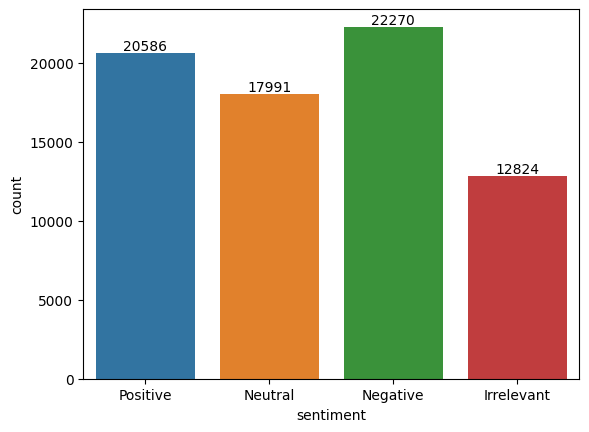

In [ ]:
ax=sns.countplot(data=train_data,x='sentiment');
for container in ax.containers:
    ax.bar_label(container)

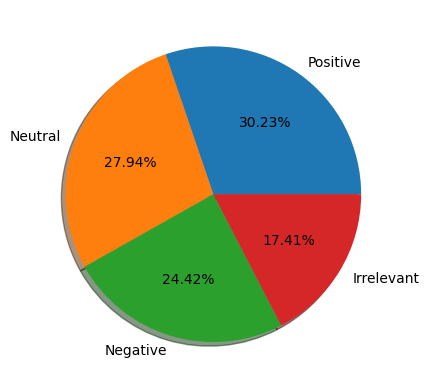

In [ ]:
plt.pie(train_data.sentiment.value_counts(),autopct="%1.2f%%",shadow=True,labels=train_data.sentiment.unique());

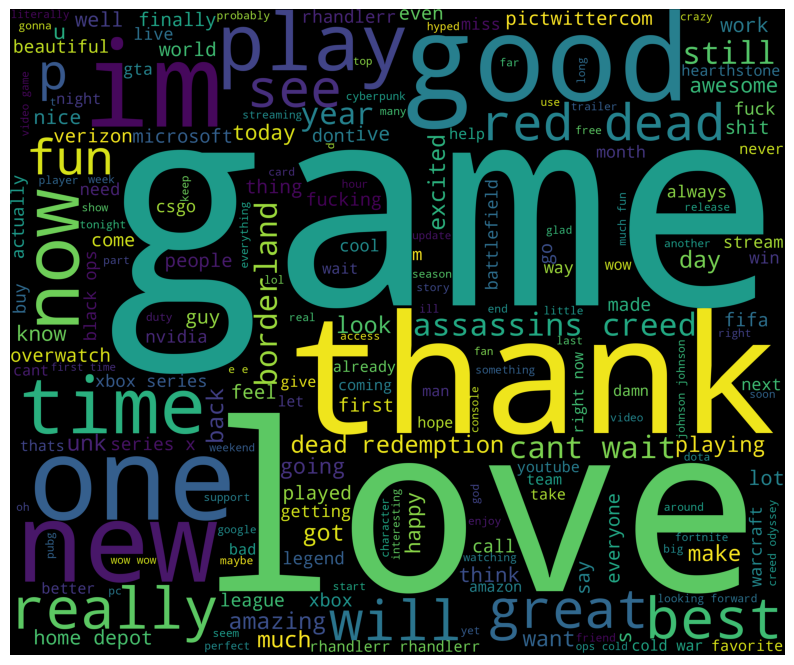

In [ ]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(train_data[train_data["sentiment"]=="Positive"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

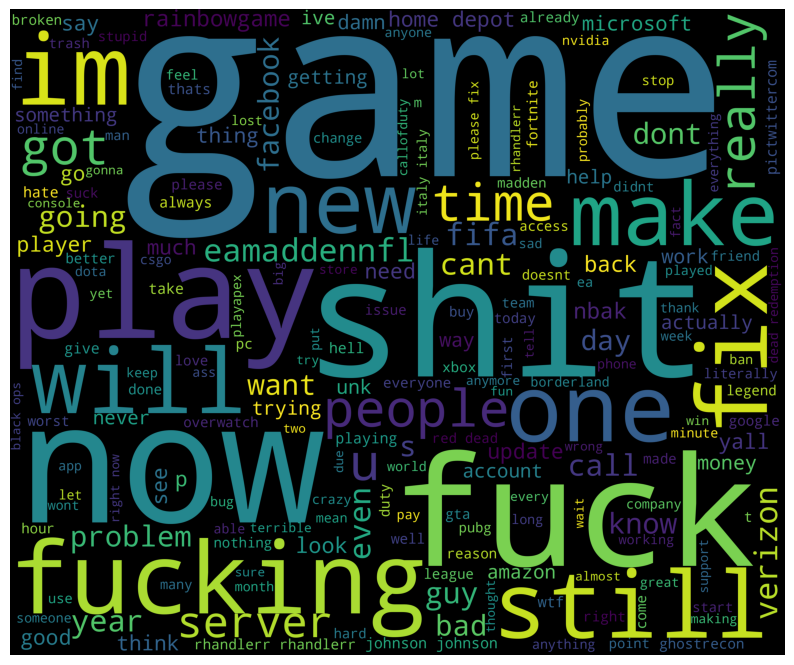

In [ ]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(train_data[train_data["sentiment"]=="Negative"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

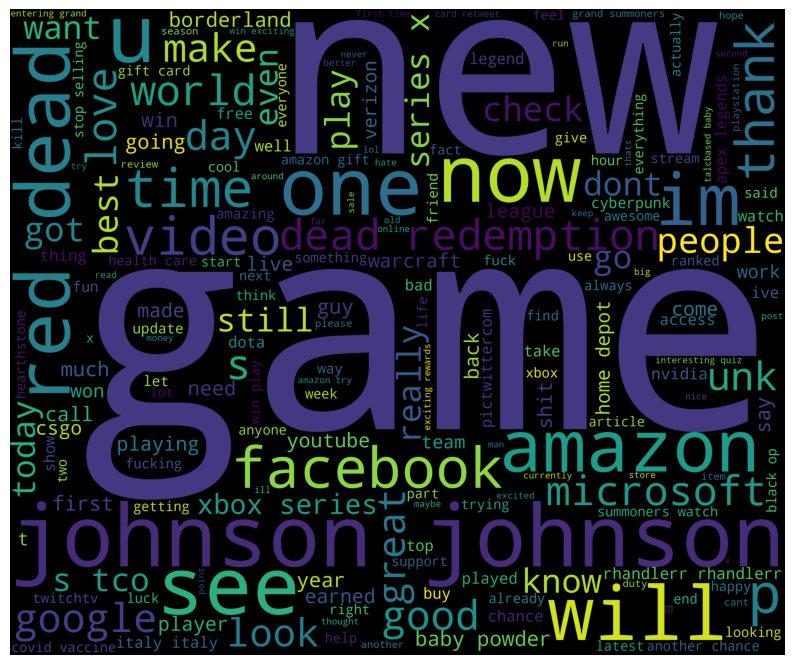

In [ ]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(train_data[train_data["sentiment"]=="Neutral"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

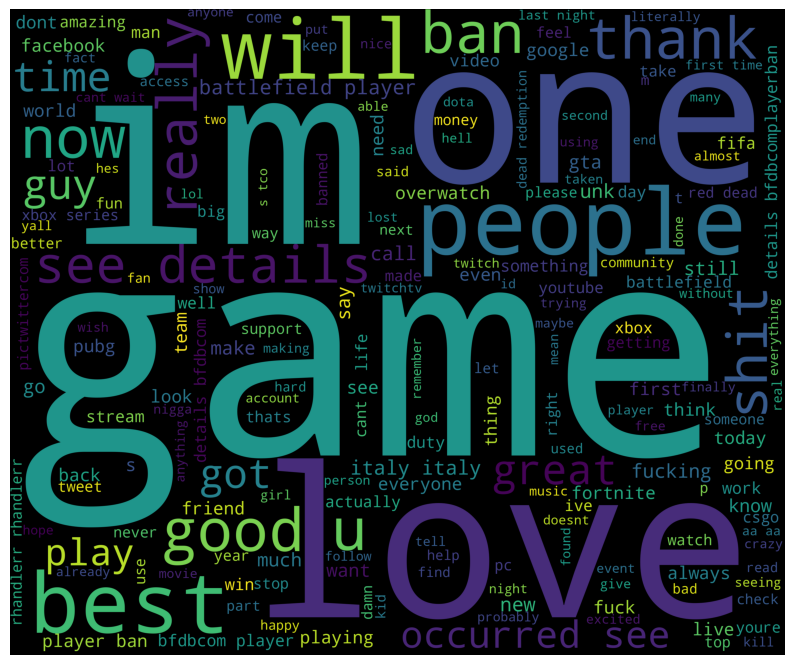

In [ ]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(train_data[train_data["sentiment"]=="Irrelevant"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

# Renaming the dataframe from "train_data" to "df"

In [ ]:
df = train_data

In [ ]:
df.head()

,id,information,sentiment,text,clean_text,textLen,cleantextLen
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,11,10
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,13,12
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,11,10
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,11,10
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,13,11


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['sentiment']=oe.fit_transform(df[['sentiment']])

In [ ]:
oe.categories_

[array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)]

In [ ]:
x=df['clean_text']
y=df['sentiment']

In [ ]:
y.value_counts()

1.0    22270
3.0    20586
2.0    17991
0.0    12824
Name: sentiment, dtype: int64

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(stop_words='english',min_df=10,max_features=4000)
# # x=cv.fit_transform(x).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,stratify=y)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv=CountVectorizer(stop_words='english',ngram_range=(1,4),min_df=10)
# xtraincv=cv.fit_transform(xtrain).toarray()
# xtestcv=cv.transform(xtest).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',ngram_range=(1,4),min_df=10)
xtrain = tf.fit_transform(xtrain).toarray()
xtest = tf.transform(xtest).toarray()

The given code initializes a `TfidfVectorizer` object from the `sklearn.feature_extraction.text` module. This vectorizer is commonly used for text feature extraction and transformation.

Let's break down the parameters used in the `TfidfVectorizer` initialization:

- `stop_words='english'`: This parameter specifies that commonly occurring English words, such as articles (e.g., 'a', 'an', 'the') and prepositions (e.g., 'in', 'on', 'at'), should be ignored during the vectorization process. These words are often considered less informative for machine learning tasks.

- `ngram_range=(1, 4)`: This parameter determines the range of n-grams to be considered during vectorization. An n-gram is a contiguous sequence of n words. In this case, it specifies that the vectorizer should consider n-grams ranging from unigrams (single words) up to four-grams (sequences of four words).

- `min_df=10`: This parameter sets the minimum frequency threshold for a word to be included in the feature vector. It specifies that a word must appear in at least 10 documents to be considered during vectorization. Words that occur less frequently are typically excluded as they may be noise or specific to certain documents.

By initializing the `TfidfVectorizer` object with these parameters, you can use it to transform a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical representation of the importance of a term in a document relative to a collection of documents.

In [ ]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf.get_feature_names_out()

array(['aaa', 'aaron', 'ab', ..., 'zonestreamcx', 'zoom', 'zuckerberg'],
      dtype=object)

In [ ]:
len(tf.get_feature_names_out())

8612

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)

    print(f"Training Accuracy:- {train}\n Testing Accuracy:-  {test}")
    print(classification_report(ytest,ypred))
    sns.heatmap(confusion_matrix(ytest,ypred),a  nnot=True,cmap="YlGnBu")
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('True Lable',size=15)

    return model

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomTreesEmbedding,RandomForestClassifier

Training Accuracy:- 0.7830673466617541
 Testing Accuracy:-  0.7082164509999095
              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62      3847
         1.0       0.76      0.79      0.77      6681
         2.0       0.65      0.67      0.66      5398
         3.0       0.71      0.75      0.73      6176

    accuracy                           0.71     22102
   macro avg       0.71      0.69      0.70     22102
weighted avg       0.71      0.71      0.71     22102



LogisticRegression()

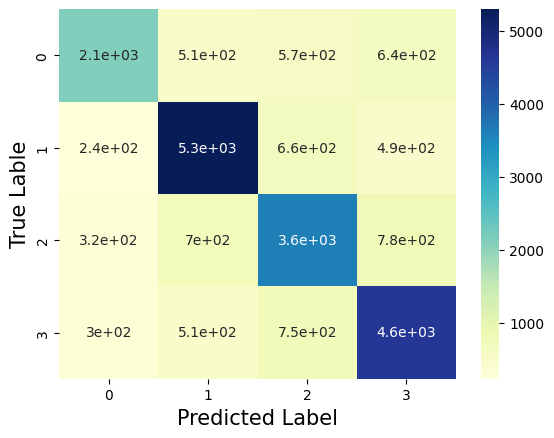

In [ ]:
lr = LogisticRegression()
mymodel(lr)

Training Accuracy:- 0.7650526479086273
 Testing Accuracy:-  0.6970409917654511
              precision    recall  f1-score   support

         0.0       0.72      0.51      0.60      3847
         1.0       0.73      0.79      0.76      6681
         2.0       0.64      0.65      0.65      5398
         3.0       0.69      0.75      0.72      6176

    accuracy                           0.70     22102
   macro avg       0.70      0.68      0.68     22102
weighted avg       0.70      0.70      0.69     22102



LogisticRegression(C=1, max_iter=200, solver='liblinear')

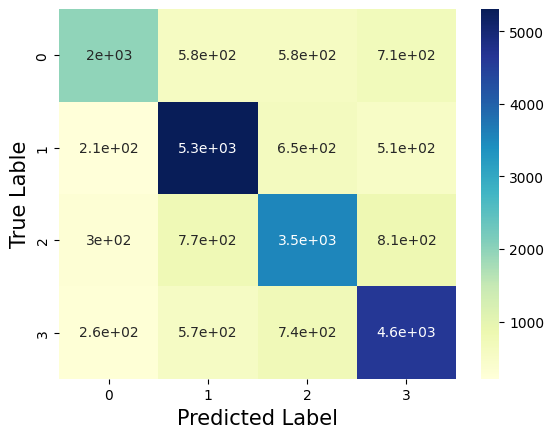

In [ ]:
lr=LogisticRegression(C=1, solver="liblinear",max_iter=200)
mymodel(lr)


The given code initializes a `LogisticRegression` classifier from the `sklearn.linear_model` module. Logistic regression is a popular classification algorithm used for binary classification problems.

Let's break down the parameters used in the `LogisticRegression` initialization:

- `C=1`: This parameter represents the inverse of the regularization strength. Smaller values of C indicate stronger regularization, which helps prevent overfitting by reducing the impact of individual data points. Larger values of C reduce the regularization effect, allowing the model to fit the training data more closely. The value of 1 is a common starting point and can be adjusted based on the specific problem and dataset.

- `solver="liblinear"`: This parameter specifies the algorithm used for optimization during model training. The "liblinear" solver is suitable for both small and large datasets and supports L1 and L2 regularization. It is generally a good choice for logistic regression problems.

- `max_iter=200`: This parameter sets the maximum number of iterations for the solver to converge. The solver iteratively updates the model's coefficients until convergence or until the maximum number of iterations is reached. Setting an appropriate value ensures that the model has enough iterations to converge on the optimal solution.

By initializing the `LogisticRegression` classifier with these parameters, you can create a logistic regression model that can be trained on labeled data to predict binary outcomes. The model learns the coefficients for each feature and uses them to make predictions based on the input data.

Training Accuracy:- 0.6915976652640152
 Testing Accuracy:-  0.6429282417880735
              precision    recall  f1-score   support

         0.0       0.61      0.54      0.57      3847
         1.0       0.72      0.71      0.72      6681
         2.0       0.74      0.43      0.54      5398
         3.0       0.56      0.82      0.67      6176

    accuracy                           0.64     22102
   macro avg       0.66      0.62      0.62     22102
weighted avg       0.66      0.64      0.64     22102



BernoulliNB()

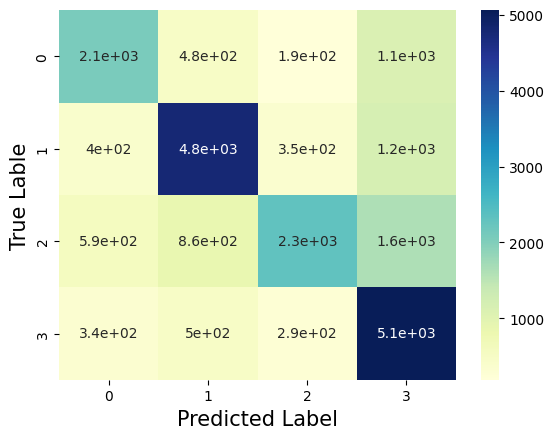

In [ ]:
bnb=BernoulliNB()
mymodel(bnb)

Training Accuracy:- 0.7082937423645989
 Testing Accuracy:-  0.6545561487648177
              precision    recall  f1-score   support

         0.0       0.76      0.40      0.52      3847
         1.0       0.64      0.82      0.71      6681
         2.0       0.69      0.52      0.59      5398
         3.0       0.63      0.76      0.69      6176

    accuracy                           0.65     22102
   macro avg       0.68      0.62      0.63     22102
weighted avg       0.67      0.65      0.64     22102



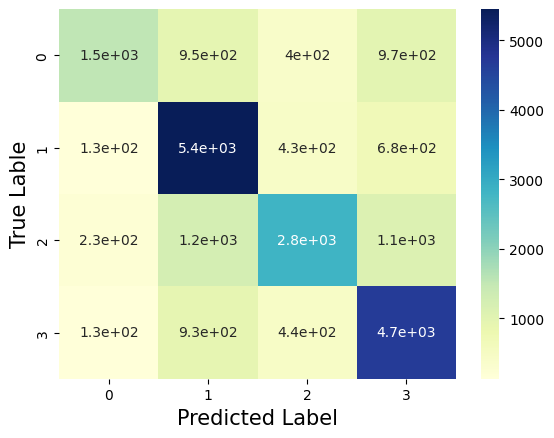

In [ ]:
mln=mymodel(MultinomialNB())

Training Accuracy:- 0.9643972153813337
 Testing Accuracy:-  0.8637227400235273
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      3847
         1.0       0.89      0.89      0.89      6681
         2.0       0.88      0.84      0.86      5398
         3.0       0.80      0.91      0.85      6176

    accuracy                           0.86     22102
   macro avg       0.87      0.85      0.86     22102
weighted avg       0.87      0.86      0.86     22102



RandomForestClassifier()

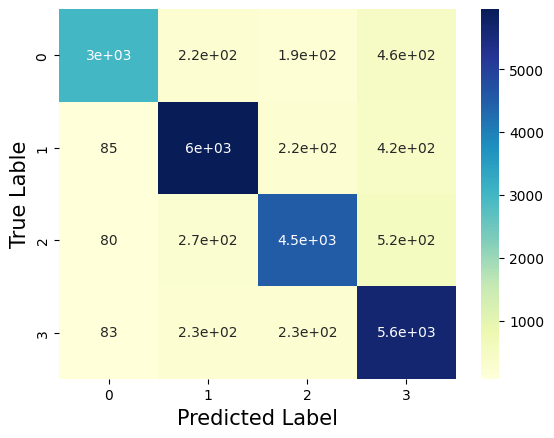

In [ ]:
mymodel(RandomForestClassifier())

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)

In [ ]:
mymodel(XGB)